In [ ]:
# Import relevant libraries
import requests
import pandas as pd
import os
import json
import requests
import seaborn as sns
import matplotlib.pyplot as plot
import numpy as np
import geopandas as gpd
import shapefile as shp
import plotly.express as px
import plotly.graph_objects as go
from shapely.geometry import Point

sns.set_style('whitegrid')

In [ ]:
dataset=pd.read_csv("complete_dataset.csv")


In [ ]:
# Aggregating relevant state-level data
state_level_df = dataset.groupby('State').agg({
    'State Population': 'first',  # State population is the same for all cities in a state
    'State Area (sq. km)': 'first',
    'Forest Area(sq. km in state)': 'first',
    'Registered Vehicles in State': 'first',
    'Farmers (in state)': 'first',
    'Factories (in state)': 'first',
    'Shipping Cargo Volume ( million metric tons in state)': 'first',
    'Coal Capacity (Max Electricity ouput in MW)': 'first',
    'Gas Capacity (Max Electricity ouput in MW)': 'first',
    'Temperature': 'mean',  #average temperature across the cities
    'Pressure': 'mean',
    'Humidity': 'mean',
    'Wind': 'mean',
    'Precipitation': 'mean',
    'Clouds': 'mean',
    'Sunshine': 'mean',
    'aqi': 'mean',  # Average AQI across cities in the state
    'missing_aqi': 'mean'  # Average of missing AQI proportions
}).reset_index()

# Define AQI categories and corresponding labels
aqi_bins = [0, 50, 100, 200, 300, 400, 500]
aqi_labels = ["Good", "Satisfactory", "Moderate", "Poor", "Very Poor", "Severe"]

# Add the AQI_Category column with categorical data type
state_level_df['AQI Category'] = pd.cut(
    state_level_df['aqi'],
    bins=aqi_bins,
    labels=aqi_labels,
    include_lowest=True
)

# Convert AQI_Category to a categorical data type with ordered categories
state_level_df['AQI Category'] = pd.Categorical(
    state_level_df['AQI Category'],
    categories=aqi_labels,
    ordered=True
)

display(state_level_df)

,State,State Population,State Area (sq. km),Forest Area(sq. km in state),Registered Vehicles in State,Farmers (in state),Factories (in state),Shipping Cargo Volume ( million metric tons in state),Coal Capacity (Max Electricity ouput in MW),Gas Capacity (Max Electricity ouput in MW),Temperature,Pressure,Humidity,Wind,Precipitation,Clouds,Sunshine,aqi,missing_aqi,AQI Category
0,andhra pradesh,53402000.0,162968.0,29784.00,13108491.0,16967754.0,0.0,175.18,11275.0,7508.20,296.416250,1007.492500,72.758750,2.388750,0.010000,27.730000,126.517500,108.428128,0.173387,Moderate
1,arunachal pradesh,1580000.0,83743.0,66431.00,230126.0,36171.0,0.0,0.00,0.0,0.00,288.900000,1011.150000,71.490000,1.420000,0.020000,32.070000,98.920000,89.454545,0.290323,Satisfactory
2,assam,36159000.0,78438.0,28312.00,4358529.0,1845346.0,6425.0,0.00,0.0,479.20,289.920000,1012.134000,76.724000,1.432000,0.024000,31.892000,116.046000,189.857048,0.086022,Moderate
3,bihar,129205000.0,94163.0,7381.00,9903889.0,18345649.0,6345.0,0.00,10040.0,0.00,288.837000,1017.316500,69.373500,2.293000,0.168500,23.542000,190.784000,227.372241,0.102919,Poor
4,chandigarh,1247000.0,114.0,22.88,1058857.0,1687.0,423.0,0.00,0.0,0.00,285.620000,998.690000,67.120000,2.300000,0.040000,26.400000,196.920000,289.225806,0.000000,Poor
5,chhattisgarh,30638000.0,135192.0,55717.00,6986219.0,5091882.0,5103.0,0.00,17795.0,0.00,292.322500,1003.602500,57.402500,1.877500,0.010000,15.635000,216.077500,98.811884,0.084677,Satisfactory
6,delhi,21884000.0,1483.0,195.00,11892877.0,39475.0,0.0,0.00,0.0,2208.40,286.220000,1015.600000,80.840000,2.310000,0.010000,30.560000,141.310000,354.838710,0.000000,Very Poor
7,gujarat,72653000.0,196244.0,14926.00,26836981.0,6839415.0,36727.0,553.92,15592.0,7990.72,294.378000,1016.344000,58.928000,2.956000,0.000000,9.132000,256.108000,111.773422,0.170507,Moderate
8,haryana,30694000.0,44212.0,1603.00,8599668.0,1528133.0,13780.0,0.00,4065.0,430.00,286.389583,1011.462917,67.899583,2.380417,0.018333,23.964583,185.014583,177.193706,0.059140,Moderate
9,himachal pradesh,7518000.0,55673.0,15443.00,1711920.0,175038.0,5254.0,0.00,0.0,0.00,285.620000,998.690000,67.120000,2.300000,0.040000,26.400000,196.920000,298.766667,0.032258,Poor


In [ ]:
map_df = gpd.read_file("india-polygon.shp")
map_df["st_nm"] = map_df["st_nm"].str.lower()
display(map_df)

,id,st_nm,geometry
0,None,andaman and nicobar islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,None,arunachal pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,None,assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,None,bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.3764,..."
4,None,chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."
5,None,chhattisgarh,"POLYGON ((83.94694 23.62196, 83.95594 23.62406..."
6,None,dadra and nagar haveli,"POLYGON ((73.2064 20.12165, 73.20865 20.10695,..."
7,None,daman and diu,"POLYGON ((72.80144 20.37378, 72.84418 20.47463..."
8,None,goa,"POLYGON ((74.11982 15.65278, 74.24806 15.65698..."
9,None,gujarat,"MULTIPOLYGON (((68.35808 23.80475, 68.41658 23..."


In [ ]:
map_df = map_df.set_index('st_nm').join(state_level_df.set_index("State"))

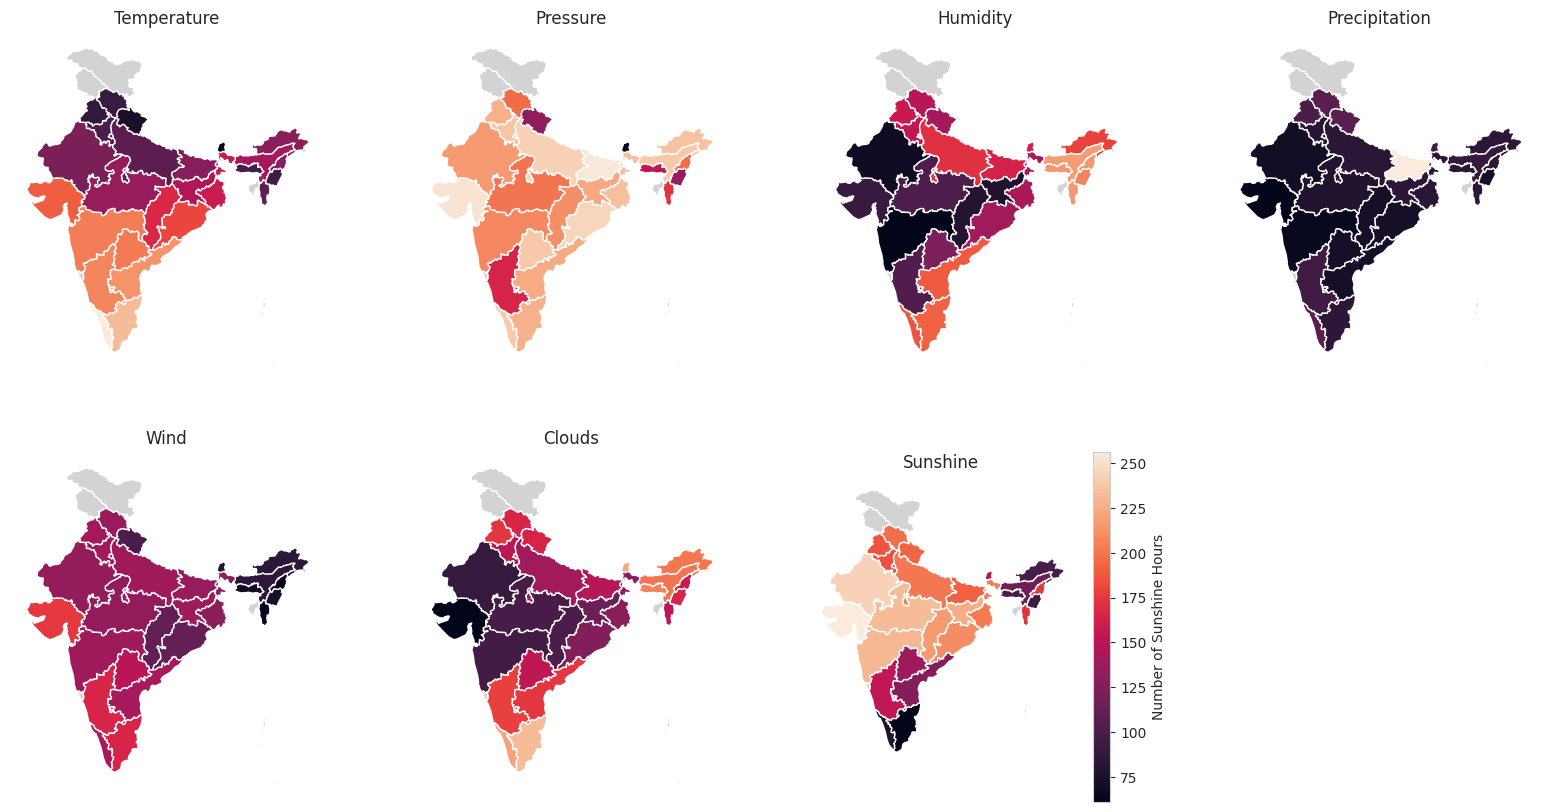

In [ ]:
fig, axs = plot.subplots(2,4,figsize=(20,10))
map_df.plot(column="Temperature", ax=axs[0,0], missing_kwds=dict(color='lightgrey'))
axs[0,0].set_title("Temperature", fontsize=12)
axs[0,0].axis('off')

map_df.plot(column="Pressure", ax=axs[0,1], missing_kwds=dict(color='lightgrey'))
axs[0,1].set_title("Pressure", fontsize=12)
axs[0,1].axis('off')

map_df.plot(column="Humidity", ax=axs[0,2], missing_kwds=dict(color='lightgrey'))
axs[0,2].set_title("Humidity", fontsize=12)
axs[0,2].axis('off')

map_df.plot(column="Precipitation", ax=axs[0,3], missing_kwds=dict(color='lightgrey'))
axs[0,3].set_title("Precipitation", fontsize=12)
axs[0,3].axis('off')

map_df.plot(column="Wind", ax=axs[1,0], missing_kwds=dict(color='lightgrey'))
axs[1,0].set_title("Wind", fontsize=12)
axs[1,0].axis('off')

map_df.plot(column="Clouds", ax=axs[1,1], missing_kwds=dict(color='lightgrey'))
axs[1,1].set_title("Clouds", fontsize=12)
axs[1,1].axis('off')

map_df.plot(column="Sunshine", ax=axs[1,2], legend = True, legend_kwds={"label": "Number of Sunshine Hours"}, missing_kwds=dict(color='lightgrey'))
axs[1,2].set_title("Sunshine", fontsize=12)
axs[1,2].axis('off')

fig.delaxes(axs[1,3])

(66.75116515860564, 98.83667566129934, 5.242309158697402, 38.56643543448905)

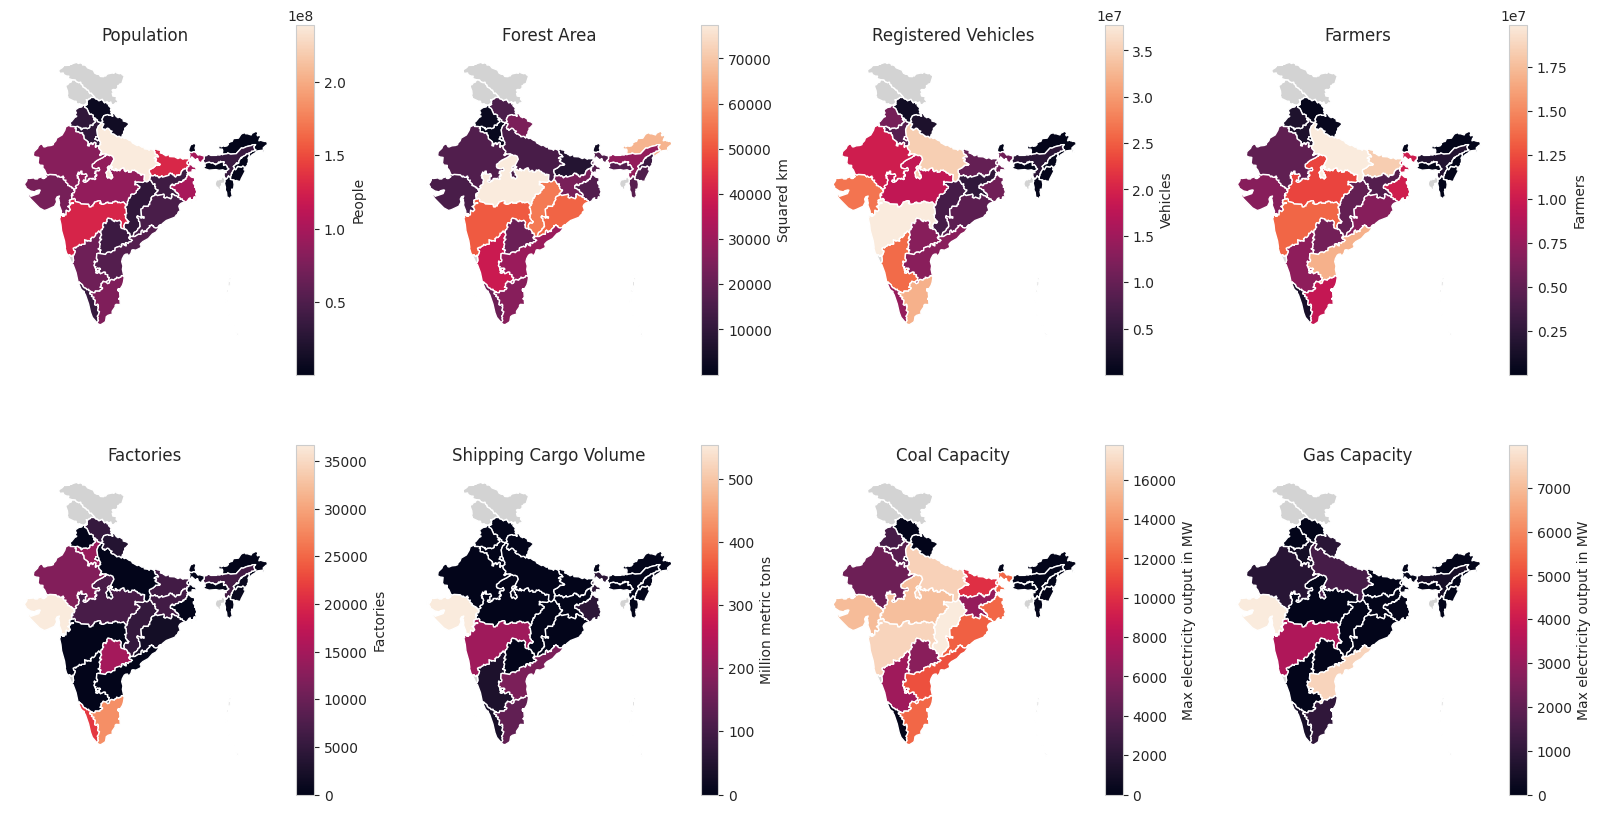

In [ ]:
fig, axs = plot.subplots(2,4,figsize=(20,10))
map_df.plot(column="State Population", ax=axs[0,0], missing_kwds=dict(color='lightgrey'),legend = True, legend_kwds={"label": "People"})
axs[0,0].set_title("Population", fontsize=12)
axs[0,0].axis('off')

map_df.plot(column="Forest Area(sq. km in state)", ax=axs[0,1], missing_kwds=dict(color='lightgrey'), legend = True, legend_kwds={"label": "Squared km"})
axs[0,1].set_title("Forest Area", fontsize=12)
axs[0,1].axis('off')

map_df.plot(column="Registered Vehicles in State", ax=axs[0,2], missing_kwds=dict(color='lightgrey'), legend = True, legend_kwds={"label": "Vehicles"})
axs[0,2].set_title("Registered Vehicles", fontsize=12)
axs[0,2].axis('off')

map_df.plot(column="Farmers (in state)", ax=axs[0,3], missing_kwds=dict(color='lightgrey'), legend = True, legend_kwds={"label": "Farmers"})
axs[0,3].set_title("Farmers", fontsize=12)
axs[0,3].axis('off')

map_df.plot(column="Factories (in state)", ax=axs[1,0], missing_kwds=dict(color='lightgrey'),  legend = True, legend_kwds={"label": "Factories"})
axs[1,0].set_title("Factories", fontsize=12)
axs[1,0].axis('off')

map_df.plot(column="Shipping Cargo Volume ( million metric tons in state)", ax=axs[1,1], missing_kwds=dict(color='lightgrey'), legend = True, legend_kwds={"label": "Million metric tons"})
axs[1,1].set_title("Shipping Cargo Volume", fontsize=12)
axs[1,1].axis('off')

map_df.plot(column="Coal Capacity (Max Electricity ouput in MW)", ax=axs[1,2], missing_kwds=dict(color='lightgrey'), legend = True, legend_kwds={"label": "Max electricity output in MW"})
axs[1,2].set_title("Coal Capacity", fontsize=12)
axs[1,2].axis('off')

map_df.plot(column="Gas Capacity (Max Electricity ouput in MW)", ax=axs[1,3], legend = True, legend_kwds={"label": "Max electricity output in MW"}, missing_kwds=dict(color='lightgrey'))
axs[1,3].set_title("Gas Capacity", fontsize=12)
axs[1,3].axis('off')

<Axes: >

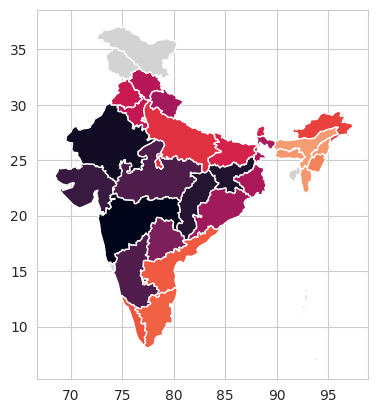

In [ ]:
map_df.plot(column="Humidity", missing_kwds=dict(color='lightgrey'))

In [ ]:
map_df[map_df["Temperature"].isna()]

,id,geometry,State Population,State Area (sq. km),Forest Area(sq. km in state),Registered Vehicles in State,Farmers (in state),Factories (in state),Shipping Cargo Volume ( million metric tons in state),Coal Capacity (Max Electricity ouput in MW),...,Temperature,Pressure,Humidity,Wind,Precipitation,Clouds,Sunshine,aqi,missing_aqi,AQI Category
st_nm,,,,,,,,,,,,,,,,,,,,,
andaman and nicobar islands,None,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dadra and nagar haveli,None,"POLYGON ((73.2064 20.12165, 73.20865 20.10695,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
daman and diu,None,"POLYGON ((72.80144 20.37378, 72.84418 20.47463...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
goa,None,"POLYGON ((74.11982 15.65278, 74.24806 15.65698...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lakshadweep,None,"MULTIPOLYGON (((74.10182 11.20491, 73.96458 11...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tripura,None,"POLYGON ((92.23295 24.50229, 92.27345 24.38673...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jammu and kashmir,None,"POLYGON ((74.09957 35.14187, 74.52028 35.10615...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ladakh,None,"POLYGON ((76.79483 33.25515, 76.39662 33.66695...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
gdf = gpd.GeoDataFrame(map_df)
fig = px.choropleth_mapbox(gdf,
                           geojson=gdf.geometry,
                           locations=gdf.index,
                           color='Temperature',
                           color_continuous_scale="YlOrRd",
                           mapbox_style="carto-positron",
                           center={"lat": gdf.geometry.centroid.y.mean(), "lon": gdf.geometry.centroid.x.mean()},
                           zoom=3.0,
                           opacity=0.8,
                           labels={'Temperature': 'Temperature (K)', 'Sunshine': 'Sunshine (hours)', 'aqi':'aqi (???)'},
                           hover_data={'Temperature': True, 'Sunshine': True, 'aqi': True}
                          )
#fig.update_layout(
 #   updatemenus=[
  #      dict(
   #         active=0,
    #        buttons=list([
     #           dict(label="Temperature",
      #               method="update",
       #              args=[{"visible": [True, False, False]},
        #                   {"title": "Temperature"}]),
         #       dict(label="Sunshine",
          #           method="update",
           #          args=[{"visible": [False, True, False]},
            #               {"title": "Sunshine",
             #               }]),
              #  dict(label="aqi",
               #      method="update",
                #     args=[{"visible": [False, False, True]},
                 #          {"title": "aqi",
                  #          }]),
           # ]),
       # )
    #])
fig.show()

<ipython-input-10-66da2720b3ce>:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center={"lat": gdf.geometry.centroid.y.mean(), "lon": gdf.geometry.centroid.x.mean()},
